# Doctor Type ML Models - k-Nearest Neighbors
Amy Jin

7/2/2018, py27 

### 5.2.6 k-Nearest Neighbors
#### What is k-Nearest Neighbors
The model for kNN is the entire training dataset. When a prediction is required for a unseen data instance, the kNN algorithm will search through the training dataset for the k-most similar instances. The prediction attribute of the most similar instances is summarized and returned as the prediction for the unseen instance.

The similarity measure is dependent on the type of data. For real-valued data, the Euclidean distance can be used. Other other types of data such as categorical or binary data, Hamming distance can be used.

In the case of regression problems, the average of the predicted attribute may be returned. In the case of classification, the most prevalent class may be returned.

#### How to do kNN
The knn steps are:

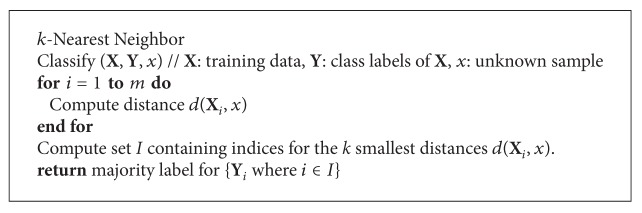

In [16]:
from IPython.display import Image
Image(filename='Pseudocode-for-KNN-classification.png')

In [13]:
# Load libraries
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv("/Users/yuejin/Documents/AmyJin_2018/Work/Test/2018_03/Doctor_Type_ML/final_table2.csv")
train, test = train_test_split(data, test_size=0.2, random_state = 100)
X_train = train.iloc[:,4:14]
y_train = train.iloc[:,1]
X_test = test.iloc[:,4:14]
y_test = test.iloc[:,1]

#### 3NN
Let's try 3-NN first and see how it works for our training data.

In [5]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

Accuracy of 3NN classifier on test set: 0.9966128121723702
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     37085
          1       0.20      0.04      0.06       114

avg / total       0.99      1.00      1.00     37199



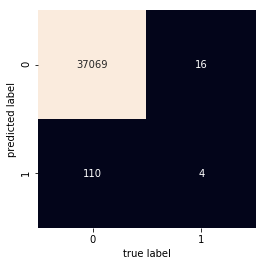

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
print('Accuracy of 3NN classifier on test set: {:.16f}'.format(knn.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# preds = clf_RF.predict_proba(X_test)[:,1]
# fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

# plt.plot(fpr, tpr)
# plt.ylabel('True Positive Rate/Sensitivity')
# plt.xlabel('False Positive Rate/1-Specificity')
# plt.grid(True)
# plt.title('ROC Curve')
# plt.show()
# roc_auc_score(y_test, preds)

#### Parameter Tuning with Cross Validation

In this section, we’ll explore a method that can be used to tune the hyperparameter K.

Obviously, the best K is the one that corresponds to the lowest test error rate, so let’s suppose we carry out repeated measurements of the test error for different values of K. Inadvertently, what we are doing is using the test set as a training set! This means that we are underestimating the true error rate since our model has been forced to fit the test set in the best possible manner. Our model is then incapable of generalizing to newer observations, a process known as overfitting. Hence, touching the test set is out of the question and must only be done at the very end of our pipeline.

An alternative and smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process. This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm! There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called k-fold cross validation.

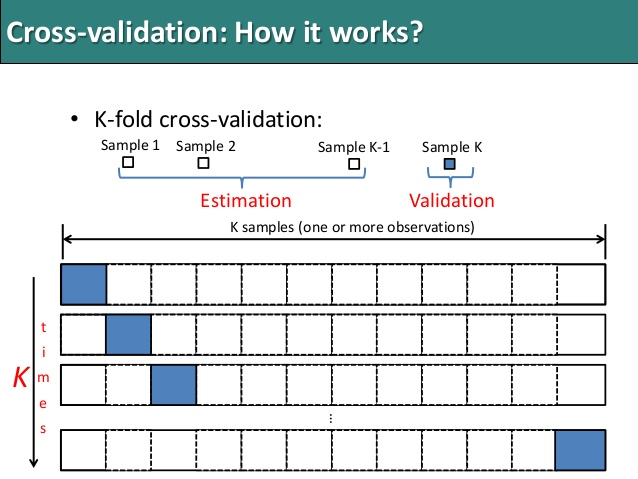

In [6]:
from IPython.display import Image
Image(filename='k_fold_cv.jpg')

As seen in the image, k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out.

**Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate its performance, or to select the appropriate level of flexibility.**

Here, let's try 10-fold cv.

In [17]:
# creating odd list of K for KNN
myList = list(range(2,8))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Scikit-learn comes in handy with its cross_val_score() method. We specifiy that we are performing 10 folds with the cv=10 parameter and that our scoring metric should be accuracy since we are in a classification setting.

The optimal number of neighbors is 7


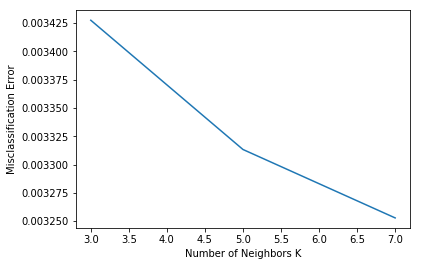

In [18]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

10-fold cross validation tells us that K=? results in the lowest validation error.

Reference: https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/